<a href="https://colab.research.google.com/github/alejandroaviles/WL_MACSS-2023/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install treecorr
!gdown --id 1LlI3srCktJmMu0TB4BLXfvbHFuJH1LWR
!gdown --id 1LlI3srCktJmMu0TB4BLXfvbHFuJH1LWR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 50.8 MB/s eta 0:00:00


In [3]:
!gdown --id 1LlI3srCktJmMu0TB4BLXfvbHFuJH1LWR

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LlI3srCktJmMu0TB4BLXfvbHFuJH1LWR
To: /content/kappa_A.0.fits
100% 4.20M/4.20M [00:00<00:00, 252MB/s]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

import treecorr

In [ ]:
# get the current working directory
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)

file_exists = os.path.exists('gamma_A.0.fits')

print(file_exists)

/content
True


In [ ]:
filename='gamma_A.0.fits'
gammaA0 = fits.getdata(filename, ext=0)


print('file:',filename)
print('file shape is',gammaA0.shape)
length=gammaA0.shape[1]

file: gamma_A.0.fits
file shape is (1024, 1024, 2)


In [ ]:
listgamma1 = np.zeros(length*length);
listgamma2 = np.zeros(length*length);
nDec = np.zeros(length*length);
nRac = np.zeros(length*length);

size_in_degrees=2;
tounits=size_in_degrees/length * np.pi/180;

print('lenght in degrees:',size_in_degrees)
print('conversion to units (rad):',tounits)


nn=0;
for jj in range(length):
    for ii in range(length):
        listgamma1[nn] = gammaA0[jj,ii,0]
        listgamma2[nn] = gammaA0[jj,ii,1]
        nDec[nn] = ii*tounits
        nRac[nn] = jj*tounits
        nn=nn+1

lenght in degrees: 2
conversion to units (rad): 3.408846195301425e-05


In [ ]:
minArcmin=1.
maxArcmin=80.
minRad=minArcmin*np.pi/60/180
maxRad=maxArcmin*np.pi/60/180
print("minRad={:.5}, maxRad={:.5}".format(minRad,maxRad))

minRad=0.00029089, maxRad=0.023271


In [ ]:
cat=treecorr.Catalog(ra=nRac,dec=nDec,g1=listgamma1,g2=listgamma2,ra_units="rad",dec_units="rad")

In [ ]:
GG=treecorr.GGCorrelation(min_sep=minRad,max_sep=maxRad,verbose=2,nbins=20)
#t1=time.perf_counter()
GG.process(cat)
#times[nSample]=round(time.perf_counter()-t1,ndigits=4)
#print(times)

nbins = 20, min,max sep = 0.000290888..0.0232711, bin_size = 0.219101


INFO:treecorr:nbins = 20, min,max sep = 0.000290888..0.0232711, bin_size = 0.219101


Starting process GG auto-correlations


INFO:treecorr:Starting process GG auto-correlations


Using 2 threads.


INFO:treecorr:Using 2 threads.


Building GField


INFO:treecorr:Building GField


Starting 256 jobs.


INFO:treecorr:Starting 256 jobs.


varg = 0.000354: sig_sn (per component) = 0.018827


INFO:treecorr:varg = 0.000354: sig_sn (per component) = 0.018827


In [ ]:
nSample=len(nDec)

In [ ]:
GG.__dict__

{'_corr': <cdata 'void *' 0x3074370>,
 'config': {'min_sep': 0.0002908882086657216,
  'max_sep': 0.023271056693257724,
  'verbose': 2,
  'nbins': 20,
  'brute': False,
  'split_method': 'mean',
  'max_top': 10,
  'precision': 4,
  'pairwise': False,
  'm2_uform': 'Crittenden',
  'metric': 'Euclidean',
  'bin_type': 'Log',
  'var_method': 'shot',
  'num_bootstrap': 500},
 'logger': <Logger treecorr (INFO)>,
 '_ro': <treecorr.binnedcorr2.Namespace at 0x7f0ddc57b130>,
 'coords': 'spherical',
 'metric': 'Euclidean',
 'results': {},
 'npatch1': 1,
 'npatch2': 1,
 '_rng': None,
 'xip': array([ 3.25671914e-04,  2.80251684e-04,  2.38893247e-04,  2.00828149e-04,
         1.64588509e-04,  1.35040756e-04,  1.09299675e-04,  8.80859776e-05,
         6.92955946e-05,  5.15944019e-05,  4.15823633e-05,  3.56679078e-05,
         2.73932055e-05,  1.92365766e-05,  1.38187798e-05,  8.69493787e-06,
         3.82221237e-06, -2.58415882e-06,  4.86778817e-06,  1.66758143e-06]),
 'xim': array([ 2.37930991e-06, 

In [ ]:
salida = np.zeros((len(GG.xip),4))  
#print(salida)              # Prints 

for ii in range(len(GG.xip)):
    salida[ii,0] = GG.meanr[ii]/np.pi*180*60
    salida[ii,1] = GG.xip[ii]
    salida[ii,2] = GG.xim[ii]
    salida[ii,3] = GG.npairs[ii]

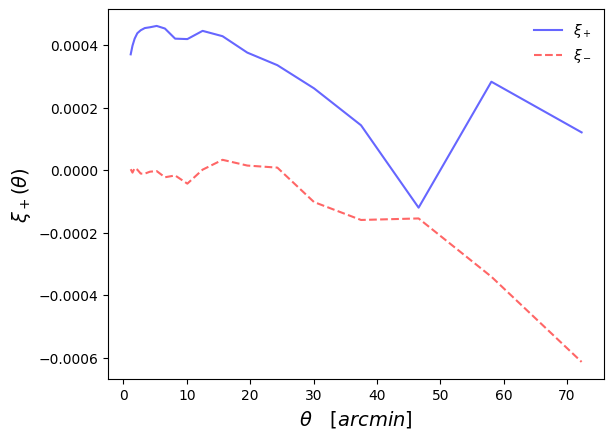

In [ ]:
thtArr=np.array(GG.meanr)/np.pi*180*60#*tounit
#plt.figure(figsize=(10,8))
fig = plt.figure();
ax1 = fig.add_subplot(1, 1, 1)
#ax1.axis('equal')
#ax1.set_xscale('log')
ax1.plot(thtArr,thtArr*GG.xip,linestyle="-",c="b",alpha=.6,label="$\\xi_+$")
ax1.plot(thtArr,thtArr*GG.xim,linestyle="--",c="r",alpha=.6,label="$\\xi_-$")
ax1.legend(frameon=False)
ax1.set_ylabel(r"$ \xi_+(\theta) $", fontsize=14)
ax1.set_xlabel(r"$\theta  \quad [arcmin]$", fontsize=14)
#plt.title(prefix+"   points="+str(nSample))

plt.show()
